In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings

warnings.filterwarnings('ignore')


In [2]:
Ntrain = pd.read_csv('train_V2.csv')
test = pd.read_csv('test_V2.csv')

In [3]:
Ntrain.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
Ntrain[Ntrain['winPlacePerc'].isnull()]
Ntrain.drop(2744604,inplace = True)

In [5]:
Ntrain['playerJoined'] = Ntrain.groupby('matchId')['matchId'].transform('count')

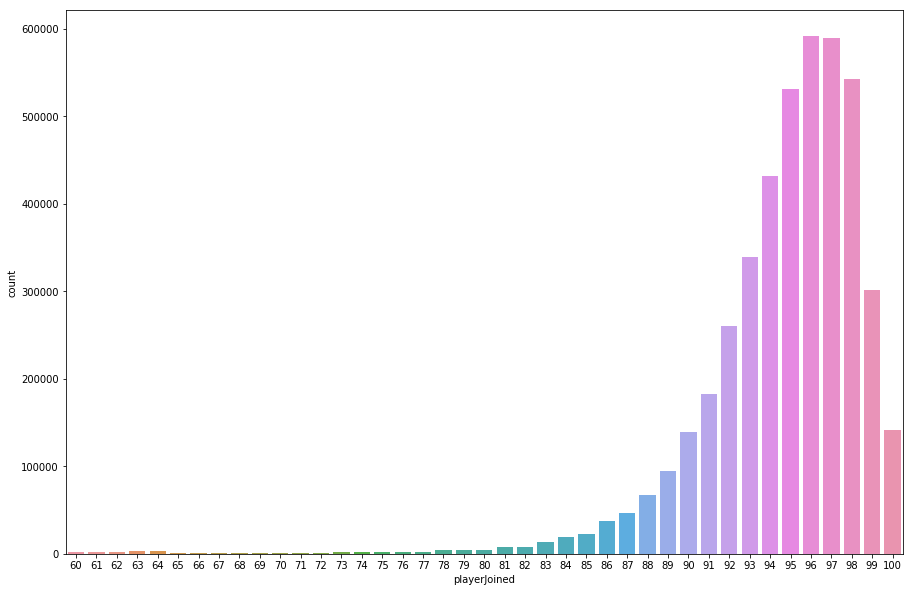

In [6]:
plt.figure(figsize = (15,10))
sns.countplot(Ntrain[Ntrain['playerJoined']>= 60]['playerJoined'])
plt.show()



In [7]:
Ntrain['killsNorm'] = Ntrain['kills']*((Ntrain['playerJoined'] - 1)/(100-1))
Ntrain['damageDealtNorm'] = Ntrain['damageDealt'] * ((Ntrain['playerJoined'] - 1)/99)
Ntrain[['kills','killsNorm','damageDealt','damageDealtNorm','playerJoined']][:11]

,kills,killsNorm,damageDealt,damageDealtNorm,playerJoined
0,0,0.000000,0.000,0.000000,96
1,0,0.000000,91.470,83.154545,91
2,0,0.000000,68.000,66.626263,98
3,0,0.000000,32.900,29.909091,91
4,1,0.969697,100.000,96.969697,97
5,1,0.949495,100.000,94.949495,95
6,0,0.000000,0.000,0.000000,97
7,0,0.000000,8.538,8.193030,96
8,0,0.000000,51.600,50.036364,97
9,0,0.000000,37.270,36.140606,97


In [8]:
Ntrain['totalDistance'] = Ntrain['rideDistance'] + Ntrain['swimDistance'] + Ntrain['walkDistance']
Ntrain['totalDistance'].head(11)

0      244.8000
1     1445.0445
2      161.8000
3      202.7000
4       49.7500
5       34.7000
6       13.5000
7     3093.0000
8      799.9000
9       65.6700
10     868.3000
Name: totalDistance, dtype: float64

In [9]:
Ntrain['killWithoutMove'] = ((Ntrain['kills'] > 0) & (Ntrain['totalDistance'] == 0))

np.shape(Ntrain[Ntrain['killWithoutMove'] == True])

(1535, 34)

In [10]:
Ntrain.drop(Ntrain[Ntrain['killWithoutMove'] == True].index,inplace = True)

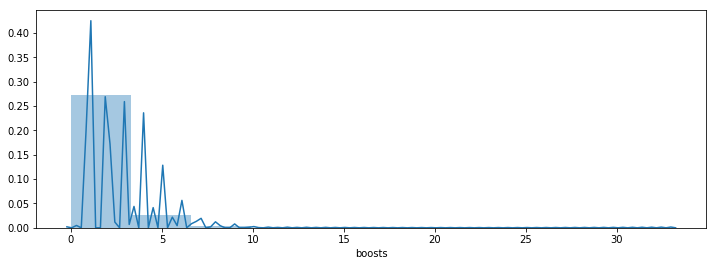

In [11]:
plt.figure(figsize=(12,4))
sns.distplot(Ntrain['boosts'], bins=10)
plt.show()



In [12]:
print(np.shape(Ntrain))
Ntrain.drop(Ntrain[Ntrain['boosts'] >11].index,inplace = True)
print(np.shape(Ntrain))

(4445430, 34)
(4444143, 34)


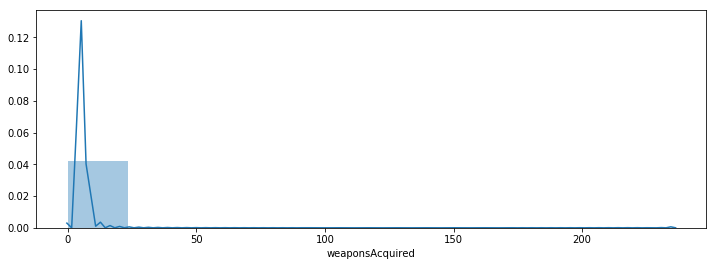

In [13]:
plt.figure(figsize=(12,4))
sns.distplot(Ntrain['weaponsAcquired'], bins=10)
plt.show()

In [14]:
print(np.shape(Ntrain))
Ntrain.drop(Ntrain[Ntrain['weaponsAcquired'] >20].index,inplace = True)
print(np.shape(Ntrain))

(4444143, 34)
(4441341, 34)


In [15]:
train = Ntrain[:200000]
np.shape(train)

(200000, 34)

In [16]:
train.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,killsNorm,damageDealtNorm,totalDistance,killWithoutMove
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,244.80,1,1466,0.4444,96,0.000000,0.000000,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,1434.00,5,0,0.6400,91,0.000000,83.154545,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,161.80,2,0,0.7755,98,0.000000,66.626263,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,202.70,3,0,0.1667,91,0.000000,29.909091,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,49.75,2,0,0.1875,97,0.969697,96.969697,49.7500,False
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,34.70,1,0,0.0370,95,0.949495,94.949495,34.7000,False
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,13.50,1,1497,0.0000,97,0.000000,0.000000,13.5000,False
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,1089.00,6,1500,0.7368,96,0.000000,8.193030,3093.0000,False
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,799.90,4,0,0.3704,97,0.000000,50.036364,799.9000,False
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,65.67,1,0,0.2143,97,0.000000,36.140606,65.6700,False


In [17]:
train = train.drop(['Id','groupId','matchId','matchType','killWithoutMove','kills','damageDealt','numGroups','swimDistance','playerJoined'],axis = 1)
Y_train = train['winPlacePerc']
X_train = train.drop(['winPlacePerc'],axis = 1)
X_train.head(21)

,assists,boosts,DBNOs,headshotKills,heals,killPlace,killPoints,killStreaks,longestKill,matchDuration,...,rideDistance,roadKills,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,killsNorm,damageDealtNorm,totalDistance
0,0,0,0,0,0,60,1241,0,0.000,1306,...,0.0000,0,0,0,244.80,1,1466,0.000000,0.000000,244.8000
1,0,0,0,0,0,57,0,0,0.000,1777,...,0.0045,0,0,0,1434.00,5,0,0.000000,83.154545,1445.0445
2,1,0,0,0,0,47,0,0,0.000,1318,...,0.0000,0,0,0,161.80,2,0,0.000000,66.626263,161.8000
3,0,0,0,0,0,75,0,0,0.000,1436,...,0.0000,0,0,0,202.70,3,0,0.000000,29.909091,202.7000
4,0,0,0,0,0,45,0,1,58.530,1424,...,0.0000,0,0,0,49.75,2,0,0.969697,96.969697,49.7500
5,0,0,1,1,0,44,0,1,18.440,1395,...,0.0000,0,0,0,34.70,1,0,0.949495,94.949495,34.7000
6,0,0,0,0,0,96,1262,0,0.000,1316,...,0.0000,0,0,0,13.50,1,1497,0.000000,0.000000,13.5000
7,0,0,0,0,0,48,1000,0,0.000,1967,...,2004.0000,0,0,0,1089.00,6,1500,0.000000,8.193030,3093.0000
8,0,0,0,0,0,64,0,0,0.000,1375,...,0.0000,0,0,0,799.90,4,0,0.000000,50.036364,799.9000
9,0,0,0,0,0,74,0,0,0.000,1930,...,0.0000,0,0,0,65.67,1,0,0.000000,36.140606,65.6700


In [18]:
Y_train.head()

0    0.4444
1    0.6400
2    0.7755
3    0.1667
4    0.1875
Name: winPlacePerc, dtype: float64

In [ ]:
X_train.shape,Y_train.shape

((200000, 23), (200000,))

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
m1 = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
m1.fit(X_train, Y_train)
mean_absolute_error(m1.predict(X_train), Y_train)

0.03499888430727124

In [27]:
X_test = test.copy()
X_test.head(11)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0
5,3e2539b5d78183,029b5a79e08cd6,10186f5c852f62,0,0,0.00,0,0,0,89,...,1490,0,0.0,0,0.0,0,0,0.0,0,0
6,d812d2f1d88a02,6285bb4eec83e4,f185809740a1a7,0,3,470.70,3,2,17,3,...,1538,0,0.0,0,0.0,0,0,1000.0,4,0
7,a8a377e4d43bf8,61ec2e7730a3b8,d31adc82a4930e,0,0,68.61,0,0,0,73,...,1487,0,0.0,0,0.0,0,0,1217.0,5,0
8,f18301e30d47d3,e7d609e08f09b6,bcde504ef16743,0,0,0.00,0,0,0,56,...,1640,0,2355.0,0,0.0,0,0,1390.0,7,0
9,ec7b965ef978b3,c4c19ef6d6c6d9,6dc5b34c92d5ff,0,0,67.32,0,0,0,54,...,-1,0,0.0,0,0.0,0,0,1634.0,5,1495


In [28]:
X_test['playerJoined'] = X_test.groupby('matchId')['matchId'].transform('count')
X_test['killsNorm'] = X_test['kills']*((X_test['playerJoined'] - 1)/(100-1))

X_test['damageDealtNorm'] = X_test['damageDealt'] * ((X_test['playerJoined'] - 1)/99)
X_test['totalDistance'] = X_test['rideDistance'] + X_test['swimDistance'] + X_test['walkDistance']
X_test.head(11)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,playerJoined,killsNorm,damageDealtNorm,totalDistance
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0.0,0,0,588.0,1,0,92,0.000000,47.301616,588.0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,0.0,0,0,2017.0,6,0,96,1.919192,171.863636,6686.0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0.0,0,0,787.8,4,0,94,0.000000,21.981818,787.8
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0.0,0,0,1812.0,3,0,89,0.000000,58.240000,1812.0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,0.0,0,0,2963.0,4,0,95,2.848485,313.523232,2963.0
5,3e2539b5d78183,029b5a79e08cd6,10186f5c852f62,0,0,0.00,0,0,0,89,...,0.0,0,0,0.0,0,0,98,0.000000,0.000000,0.0
6,d812d2f1d88a02,6285bb4eec83e4,f185809740a1a7,0,3,470.70,3,2,17,3,...,0.0,0,0,1000.0,4,0,98,4.898990,461.190909,1000.0
7,a8a377e4d43bf8,61ec2e7730a3b8,d31adc82a4930e,0,0,68.61,0,0,0,73,...,0.0,0,0,1217.0,5,0,100,0.000000,68.610000,1217.0
8,f18301e30d47d3,e7d609e08f09b6,bcde504ef16743,0,0,0.00,0,0,0,56,...,0.0,0,0,1390.0,7,0,91,0.000000,0.000000,3745.0
9,ec7b965ef978b3,c4c19ef6d6c6d9,6dc5b34c92d5ff,0,0,67.32,0,0,0,54,...,0.0,0,0,1634.0,5,1495,96,0.000000,64.600000,1634.0


In [29]:
X_test = X_test.drop(['Id','groupId','matchId','matchType','kills','damageDealt','numGroups','swimDistance','playerJoined'],axis = 1)
X_test.head(11)
np.shape(X_test),np.shape(test["Id"])

((1934174, 23), (1934174,))

In [30]:
I = np.clip(a = m1.predict(X_test), a_min = 0.0, a_max = 1.0)
I.shape

(1934174,)

In [33]:
submission1 = pd.DataFrame({
        "Id": test["Id"],
        "winPlacePerc": I
    })
submission1.to_csv('submission1.csv', index=False)
submission1.head(10)

,Id,winPlacePerc
0,9329eb41e215eb,0.219203
1,639bd0dcd7bda8,0.884177
2,63d5c8ef8dfe91,0.688836
3,cf5b81422591d1,0.544779
4,ee6a295187ba21,0.922063
5,3e2539b5d78183,0.004555
6,d812d2f1d88a02,0.665419
7,a8a377e4d43bf8,0.241848
8,f18301e30d47d3,0.545672
9,ec7b965ef978b3,0.616351
